In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn

import dg1
import plotting

seaborn.set_palette('husl')


INTERVAL_WIDTH = 1.0
TOTAL_TIME = 1.0
COLORS = seaborn.color_palette('husl', 5)

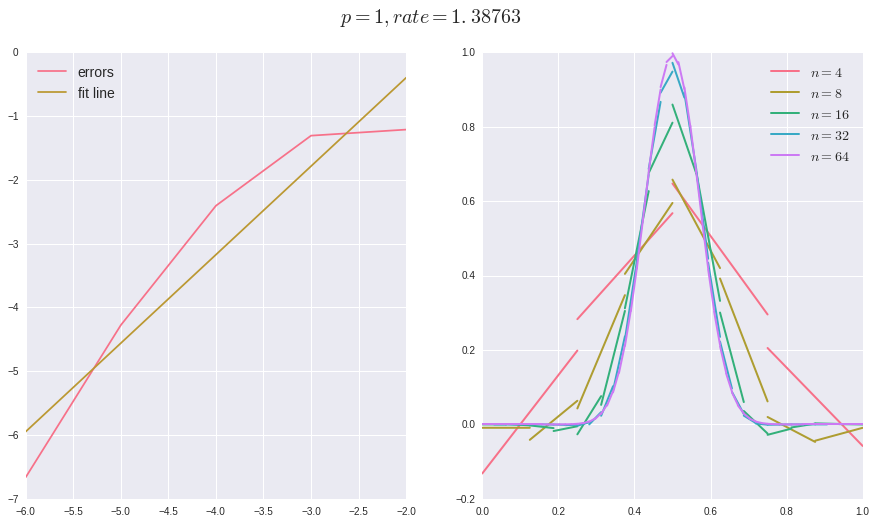

In [2]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(1, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

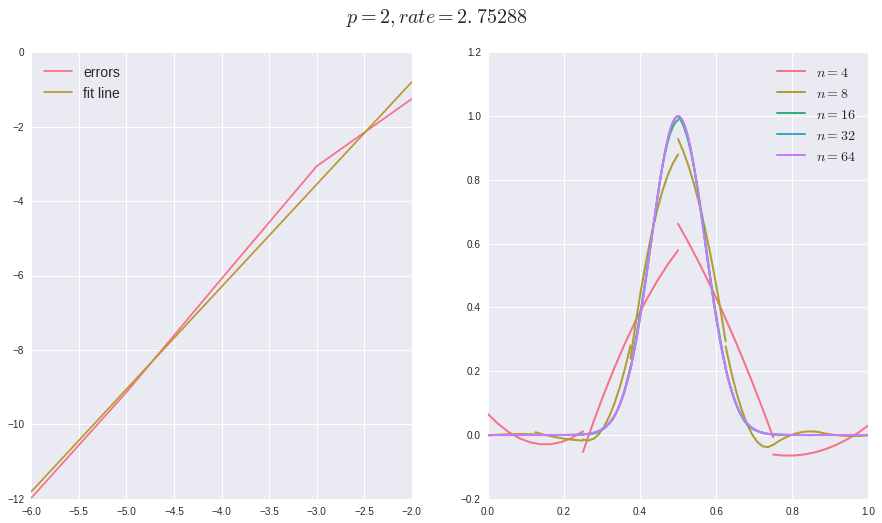

In [3]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(2, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

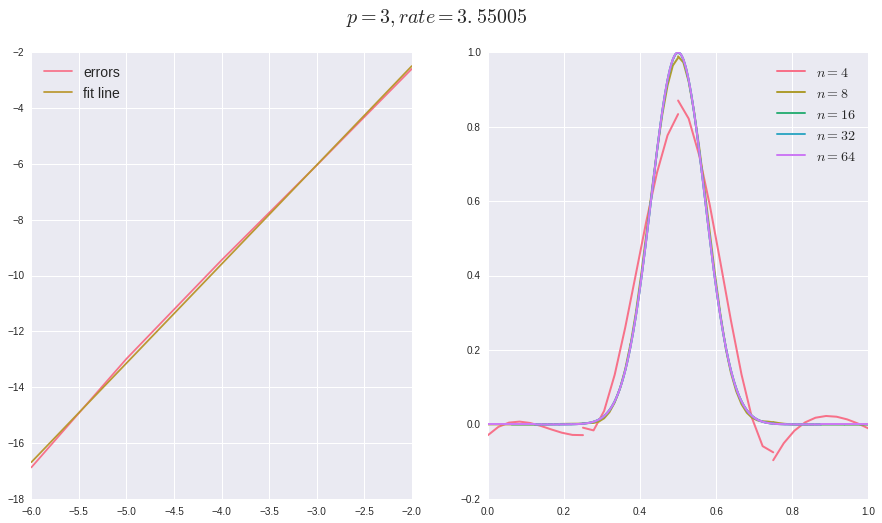

In [4]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(3, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

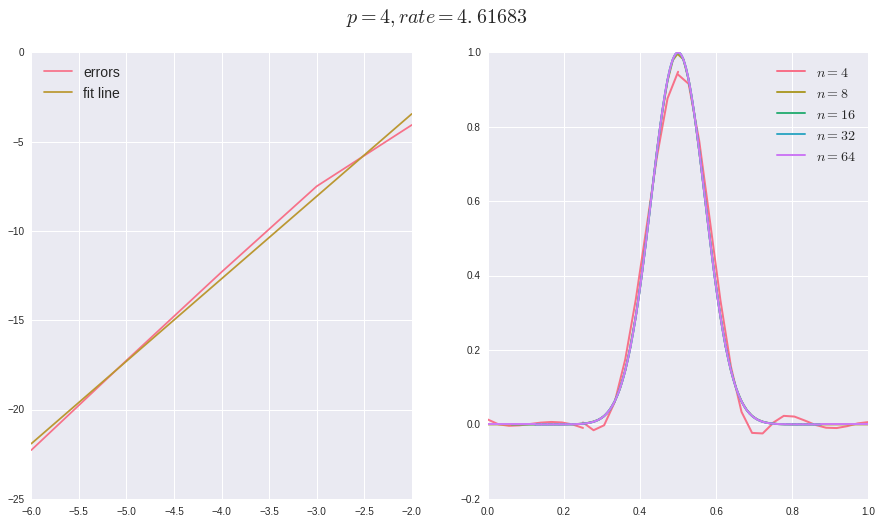

In [5]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(4, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

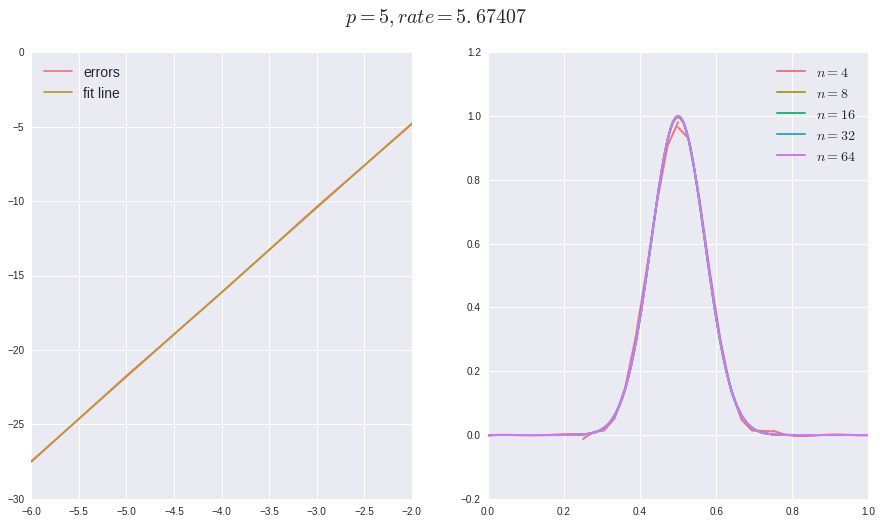

In [6]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(5, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

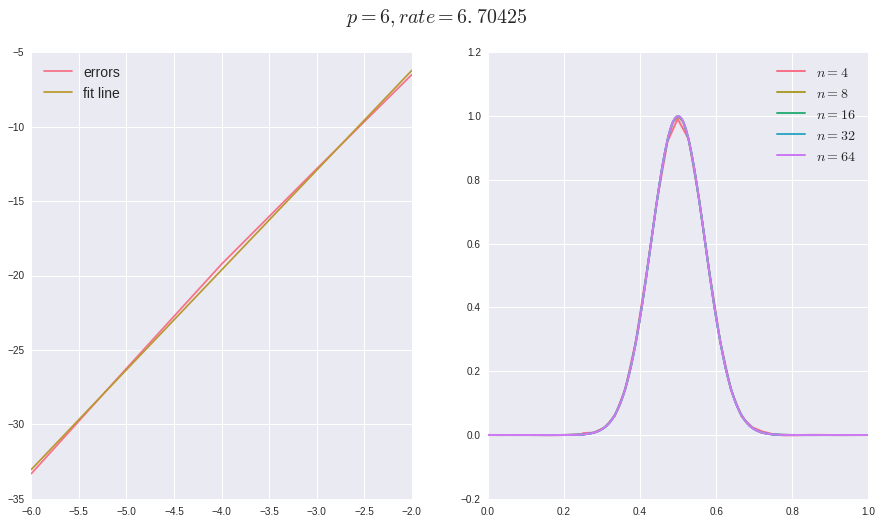

In [7]:
INTERVAL_SIZES = np.array([4, 8, 16, 32, 64])
plotting.plot_convergence(6, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

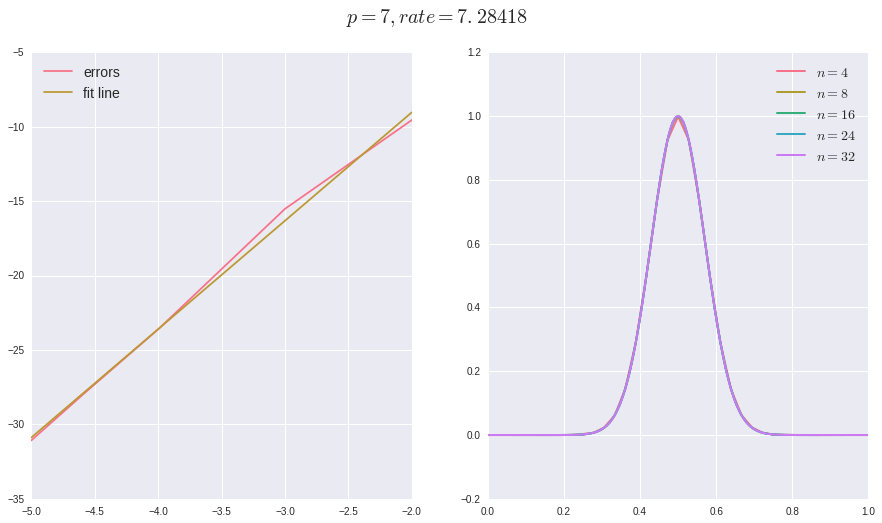

In [8]:
INTERVAL_SIZES = np.array([4, 8, 16, 24, 32])
plotting.plot_convergence(7, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

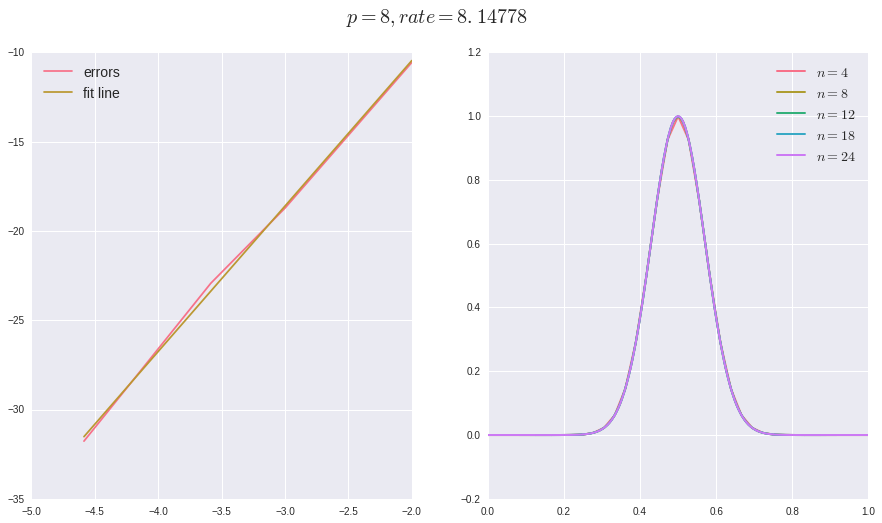

In [9]:
INTERVAL_SIZES = np.array([4, 8, 12, 18, 24])
plotting.plot_convergence(8, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

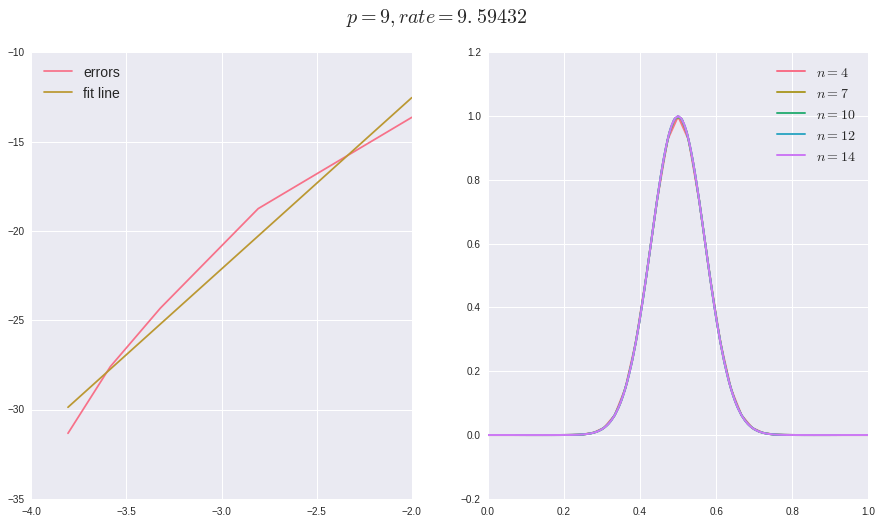

In [10]:
INTERVAL_SIZES = np.array([4, 7, 10, 12, 14])
plotting.plot_convergence(9, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

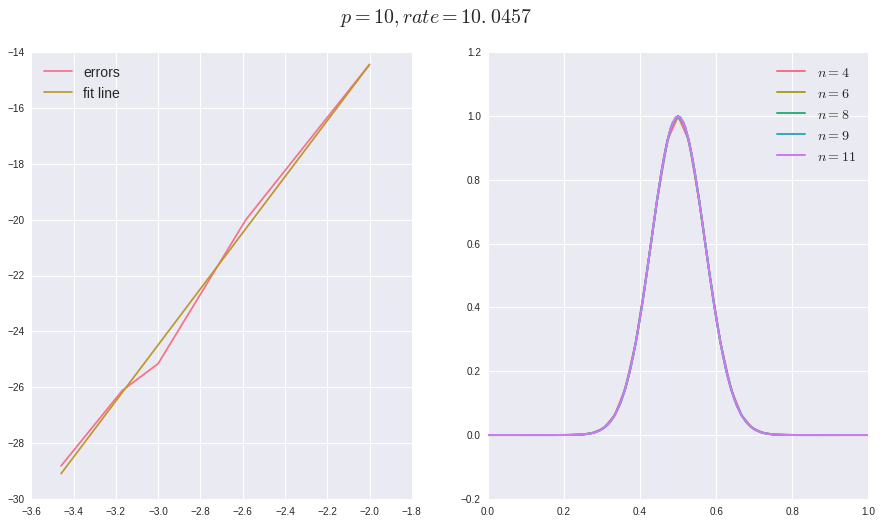

In [11]:
INTERVAL_SIZES = np.array([4, 6, 8, 9, 11])
plotting.plot_convergence(10, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

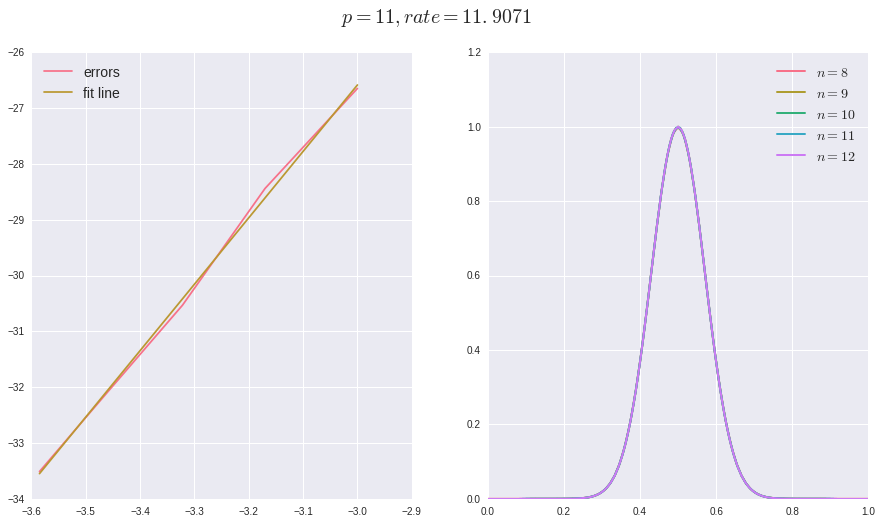

In [12]:
INTERVAL_SIZES = np.array([8, 9, 10, 11, 12])
plotting.plot_convergence(11, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

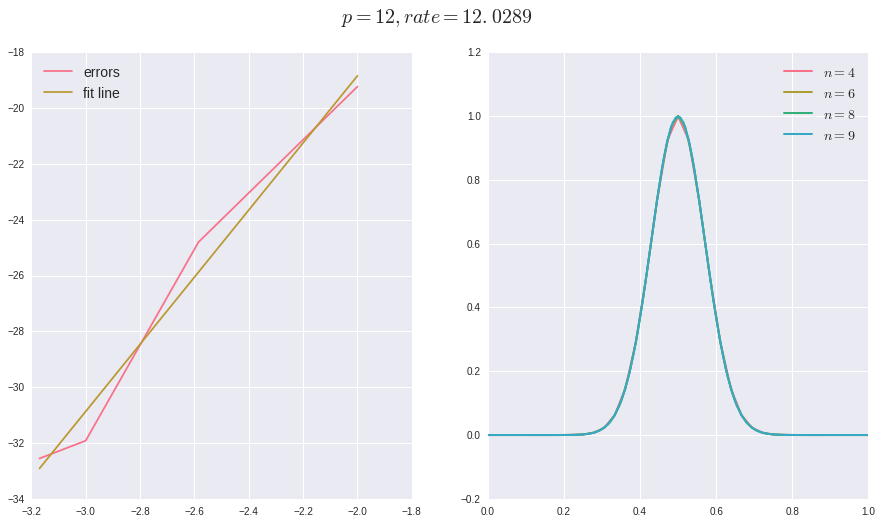

In [13]:
INTERVAL_SIZES = np.array([4, 6, 8, 9])
plotting.plot_convergence(12, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

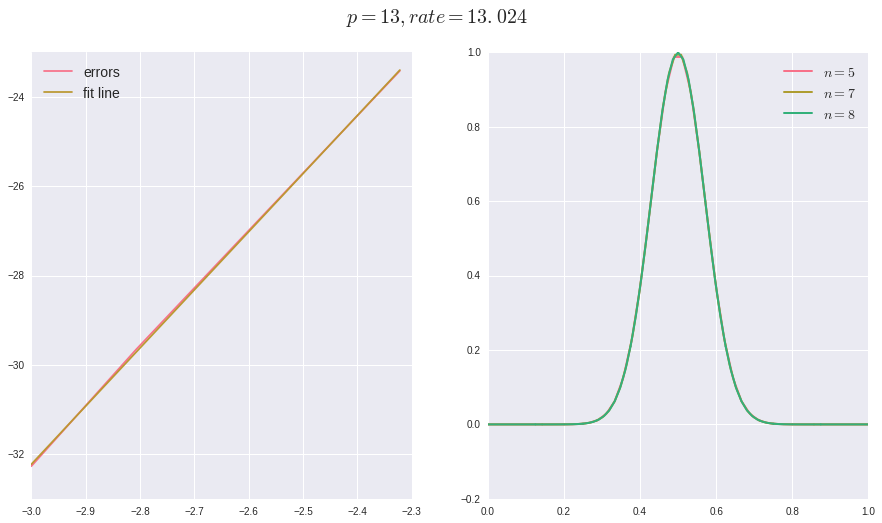

In [14]:
INTERVAL_SIZES = np.array([5, 7, 8])
plotting.plot_convergence(13, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

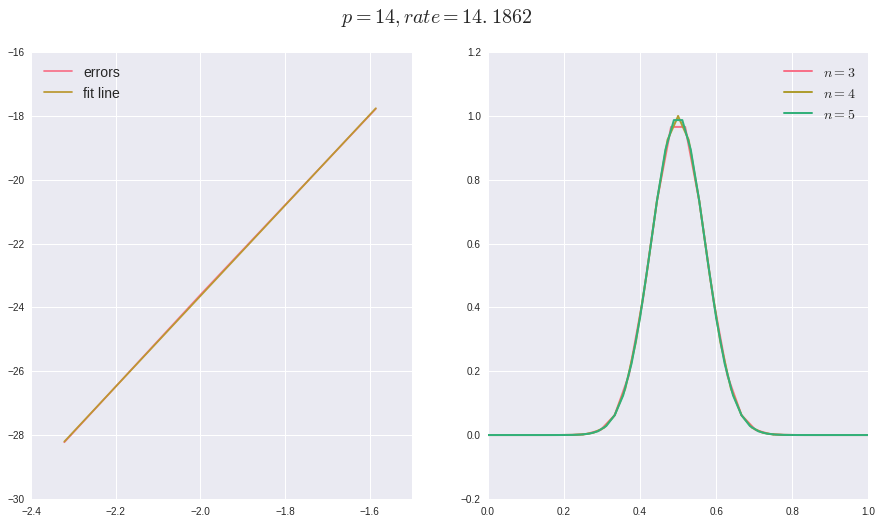

In [15]:
INTERVAL_SIZES = np.array([3, 4, 5])
plotting.plot_convergence(14, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)

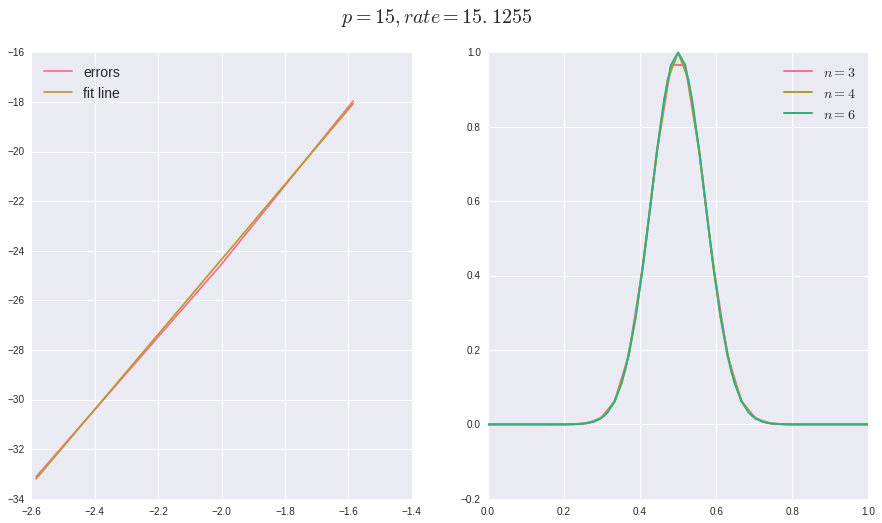

In [16]:
INTERVAL_SIZES = np.array([3, 4, 6])
plotting.plot_convergence(15, INTERVAL_SIZES, COLORS, dg1.DG1Solver,
                          points_on_ref_int=dg1.gauss_lobatto_points,
                          interval_width=INTERVAL_WIDTH,
                          total_time=TOTAL_TIME)